In [1]:
from bs4 import BeautifulSoup
from urllib import urlopen

In [2]:
AntarcticMysteryURL = "http://www.gutenberg.org/files/10339/10339-h/10339-h.htm"
AntarcticMysteryHtml = urlopen(AntarcticMysteryURL).read()  
AntarcticMysterySoup = BeautifulSoup(AntarcticMysteryHtml, 'html.parser')

# removing styles
for script in AntarcticMysterySoup(["script", "style"]):
    script.extract()

AntarcticMysteryText = AntarcticMysterySoup.get_text()

In [3]:
# removing punctuation using a regular expression
import re
AntarcticMysteryText = re.sub(r'[^\w\s]','',AntarcticMysteryText)

In [4]:
# removing all white space, this will convert the text to a big sentence
AntarcticMysteryText = ' '.join(AntarcticMysteryText.split())

# doing a type(AntarcticMysteryText) will give unicode, I dont want unicode, 
# this causes problems with charecters appearing at random
# I am converting to ansi

AntarcticMysteryText = AntarcticMysteryText.encode('ascii','ignore')

# converting all case to lower
AntarcticMysteryText = AntarcticMysteryText.lower()

# My variable is a massive string
AntarcticMysteryText[:200]

'an antarctic mystery by jules verne the project gutenberg ebook of an antarctic mystery by jules verne this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoeve'

In [189]:
# Splitting the big sentence to a list of words
AntarcticMysteryWordsList = AntarcticMysteryText.split()

In [190]:
# verifying that it is a list
type(AntarcticMysteryWordsList)

list

In [191]:
print AntarcticMysteryWordsList[:10]

['an', 'antarctic', 'mystery', 'by', 'jules', 'verne', 'the', 'project', 'gutenberg', 'ebook']


In [192]:
# Lets go into using pandas
import pandas as pd
import numpy as np

In [193]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df

In [194]:
# Pandas includes a data format called the series,
# which is a great tool for doing some quick data analysis
AntarcticMysteryWordsSeries = pd.Series(AntarcticMysteryWordsList)

In [195]:
print type(AntarcticMysteryWordsSeries)

<class 'pandas.core.series.Series'>


In [196]:
# Pandas is quite handy, it saves us from writting many funcitons
# here's the count function which runs upon the unique entries, 
# ... Frequency
AntarcticMysteryWordFrequency = AntarcticMysteryWordsSeries.value_counts()

In [197]:
print AntarcticMysteryWordFrequencyDF[:5]
print AntarcticMysteryWordFrequencyDF[-5:]

     Frequency  Rank  Actual_Percent  Expected_Percent
the       6489     1        0.078626          0.039313
of        3117     2        0.037768          0.026209
to        2388     3        0.028935          0.019656
and       2153     4        0.026087          0.015725
a         1470     5        0.017812          0.013104
             Frequency    Rank  Actual_Percent  Expected_Percent
tipsy                1  5750.5        0.000012          0.000014
nest                 1  5750.5        0.000012          0.000014
drives               1  5750.5        0.000012          0.000014
corporation          1  5750.5        0.000012          0.000014
hoar                 1  5750.5        0.000012          0.000014


In [198]:
# the value_counts comes allready sorted! So.. Sorted!
# Lets make a dataframe with it .. 
# for the only reason that I will an index for my graph later

In [199]:
type(AntarcticMysteryWordFrequency)

pandas.core.series.Series

In [200]:
AntarcticMysteryWordFrequencyDF = AntarcticMysteryWordFrequency.to_frame()
AntarcticMysteryWordFrequencyDF.columns = ['Frequency']
AntarcticMysteryWordFrequencyDF['Rank'] = AntarcticMysteryWordFrequencyDF.rank(ascending=False)
AntarcticMysteryWordFrequencyDF.set_index(['Rank'],append=True)
print AntarcticMysteryWordFrequencyDF[:5]
print AntarcticMysteryWordFrequencyDF[-5:]

     Frequency  Rank
the       6489     1
of        3117     2
to        2388     3
and       2153     4
a         1470     5
             Frequency    Rank
tipsy                1  5750.5
nest                 1  5750.5
drives               1  5750.5
corporation          1  5750.5
hoar                 1  5750.5


In [201]:
print AntarcticMysteryWordFrequencyDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, the to hoar
Data columns (total 2 columns):
Frequency    7558 non-null int64
Rank         7558 non-null float64
dtypes: float64(1), int64(1)
memory usage: 177.1+ KB
None


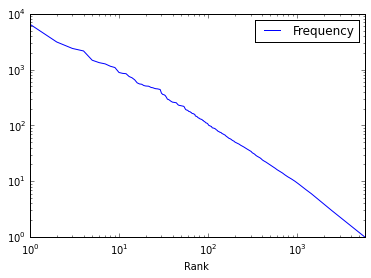

In [202]:
# Let's plot!
%matplotlib inline
AntarcticMysteryWordFrequencyDF.plot('Rank','Frequency',loglog=True)

In [203]:
# ok, this graph is very similar to this on from wikipedia: https://en.wikipedia.org/wiki/Zipf%27s_law#/media/File:Zipf_30wiki_en_labels.png

In [204]:
# Lets talk tables and dataframes
AntarcticMysteryWordFrequencyDF['Actual_Instances'] = AntarcticMysteryWordFrequencyDF['Frequency']/len(AntarcticMysteryWordsList)

In [205]:
# Inserting one more column
AntarcticMysteryWordFrequencyDF['Expected_Instances'] = 1

In [206]:
print AntarcticMysteryWordFrequencyDF[:5]
print AntarcticMysteryWordFrequencyDF[-5:]

     Frequency  Rank  Actual_Instances  Expected_Instances
the       6489     1          0.078626                   1
of        3117     2          0.037768                   1
to        2388     3          0.028935                   1
and       2153     4          0.026087                   1
a         1470     5          0.017812                   1
             Frequency    Rank  Actual_Instances  Expected_Instances
tipsy                1  5750.5          0.000012                   1
nest                 1  5750.5          0.000012                   1
drives               1  5750.5          0.000012                   1
corporation          1  5750.5          0.000012                   1
hoar                 1  5750.5          0.000012                   1


In [207]:
Starting_Value = AntarcticMysteryWordFrequencyDF.iloc[0] ['Actual_Instances']


In [228]:
Starting_Value

0.078625954198473277

In [229]:
# Setting the starting value
AntarcticMysteryWordFrequencyDF.ix['the','Expected_Instances'] = Starting_Value

In [235]:
# there must be a more clever way to do this:
    
for index, row in AntarcticMysteryWordFrequencyDF.iterrows():
    if row['Rank'] >1 : 
        v= Starting_Value/ (row['Rank'])
        AntarcticMysteryWordFrequencyDF.loc[index,'Expected_Instances'] = v

In [236]:
print AntarcticMysteryWordFrequencyDF[:10]
print AntarcticMysteryWordFrequencyDF[-10:]


      Frequency  Rank  Actual_Instances  Expected_Instances
the        6489     1          0.078626            0.078626
of         3117     2          0.037768            0.039313
to         2388     3          0.028935            0.026209
and        2153     4          0.026087            0.019656
a          1470     5          0.017812            0.015725
in         1329     6          0.016103            0.013104
was        1263     7          0.015304            0.011232
i          1146     8          0.013886            0.009828
that       1087     9          0.013171            0.008736
it          886    10          0.010735            0.007863
             Frequency    Rank  Actual_Instances  Expected_Instances
freshen              1  5750.5          0.000012            0.000014
barrenness           1  5750.5          0.000012            0.000014
foolish              1  5750.5          0.000012            0.000014
tribes               1  5750.5          0.000012            0.00

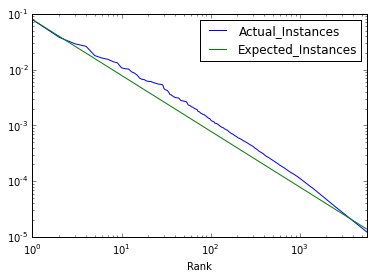

In [237]:
%matplotlib inline
AntarcticMysteryWordFrequencyDF.plot('Rank',['Actual_Instances','Expected_Instances'],loglog=True)

In [ ]:
# Quite close huh?

In [245]:
ToLearn =AntarcticMysteryWordFrequencyDF['Actual_Instances'][:1000]

In [247]:
print ToLearn.sum()

0.82705682782
